# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


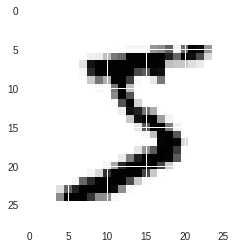

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

In [0]:
from keras.layers import SeparableConv2D

In [220]:
from keras.layers import Activation
model = Sequential()
#total_params =(filter_height * filter_width * input_image_channels + 1) * number_of_filters
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1))) #(3*3*1+1)*32
model.add(SeparableConv2D(64, 3, 3, activation='relu'))  #(3*3*32+1)*64
model.add(SeparableConv2D(128, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(SeparableConv2D(256, 3, 3, activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(10, 1))
model.add(SeparableConv2D(10, 11))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(64, (3, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(128, (3, 3), activation="relu")`
  


In [221]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_135 (Conv2D)          (None, 26, 26, 32)        320       
_________________________________________________________________
separable_conv2d_205 (Separa (None, 24, 24, 64)        2400      
_________________________________________________________________
separable_conv2d_206 (Separa (None, 22, 22, 128)       8896      
_________________________________________________________________
max_pooling2d_87 (MaxPooling (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_136 (Conv2D)          (None, 11, 11, 10)        1290      
_________________________________________________________________
separable_conv2d_207 (Separa (None, 1, 1, 10)          1320      
_________________________________________________________________
flatten_45 (Flatten)         (None, 10)                0         
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [223]:
#model.fit(X_train, Y_train, batch_size=32, nb_epoch=3, verbose=1)
model.fit_generator(datagen.flow(X_train,Y_train, batch_size=32),
                              epochs = 20, verbose = 2, 
                              steps_per_epoch=X_train.shape[0] // 32
                              )

Epoch 1/20
 - 34s - loss: 0.7295 - acc: 0.7631
Epoch 2/20
 - 32s - loss: 0.2605 - acc: 0.9210
Epoch 3/20
 - 32s - loss: 0.1875 - acc: 0.9426
Epoch 4/20
 - 32s - loss: 0.1507 - acc: 0.9543
Epoch 5/20
 - 32s - loss: 0.1204 - acc: 0.9639
Epoch 6/20
 - 32s - loss: 0.1047 - acc: 0.9682
Epoch 7/20
 - 32s - loss: 0.0911 - acc: 0.9721
Epoch 8/20
 - 32s - loss: 0.0798 - acc: 0.9762
Epoch 9/20
 - 32s - loss: 0.0764 - acc: 0.9766
Epoch 10/20
 - 32s - loss: 0.0718 - acc: 0.9775
Epoch 11/20
 - 32s - loss: 0.0657 - acc: 0.9801
Epoch 12/20
 - 32s - loss: 0.0639 - acc: 0.9801
Epoch 13/20
 - 32s - loss: 0.0616 - acc: 0.9809
Epoch 14/20
 - 32s - loss: 0.0585 - acc: 0.9822
Epoch 15/20
 - 32s - loss: 0.0539 - acc: 0.9839
Epoch 16/20
 - 32s - loss: 0.0533 - acc: 0.9833
Epoch 17/20
 - 32s - loss: 0.0511 - acc: 0.9840
Epoch 18/20
 - 32s - loss: 0.0489 - acc: 0.9849
Epoch 19/20
 - 32s - loss: 0.0497 - acc: 0.9848
Epoch 20/20
 - 32s - loss: 0.0470 - acc: 0.9857


In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [225]:
print(score)

[0.023714298488022176, 0.9931]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[7.81716491e-19 5.00712177e-14 2.65802652e-13 2.19448152e-15
  1.88704919e-21 3.39066420e-18 8.60057600e-29 1.00000000e+00
  2.29832009e-18 4.93791911e-13]
 [2.89196733e-09 1.41735484e-06 9.99998569e-01 1.35618803e-16
  2.44711557e-10 1.10318312e-16 1.04332112e-10 5.16385537e-16
  5.09330522e-10 7.83553079e-15]
 [1.01591870e-14 1.00000000e+00 6.86819601e-10 3.80742641e-20
  3.97901401e-09 2.22100528e-12 4.63851559e-13 2.04553284e-11
  3.73243415e-11 7.37889093e-14]
 [1.00000000e+00 1.27160206e-20 3.71433956e-18 2.76136573e-20
  3.56605503e-18 3.84947824e-13 2.36589450e-08 4.63400392e-21
  3.62934639e-12 2.88262997e-10]
 [1.72102944e-23 2.64706538e-11 8.69763341e-16 1.50423063e-18
  9.99999881e-01 2.67179179e-16 6.64200166e-15 9.88650636e-17
  9.47443946e-12 8.25545214e-08]
 [4.04608919e-15 1.00000000e+00 1.13577162e-10 5.85272531e-21
  5.02496844e-09 1.70323350e-14 1.59569447e-13 5.56335811e-11
  3.04284549e-11 2.19582802e-13]
 [1.03678659e-28 3.60065977e-10 1.01015409e-12 1.27817305e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

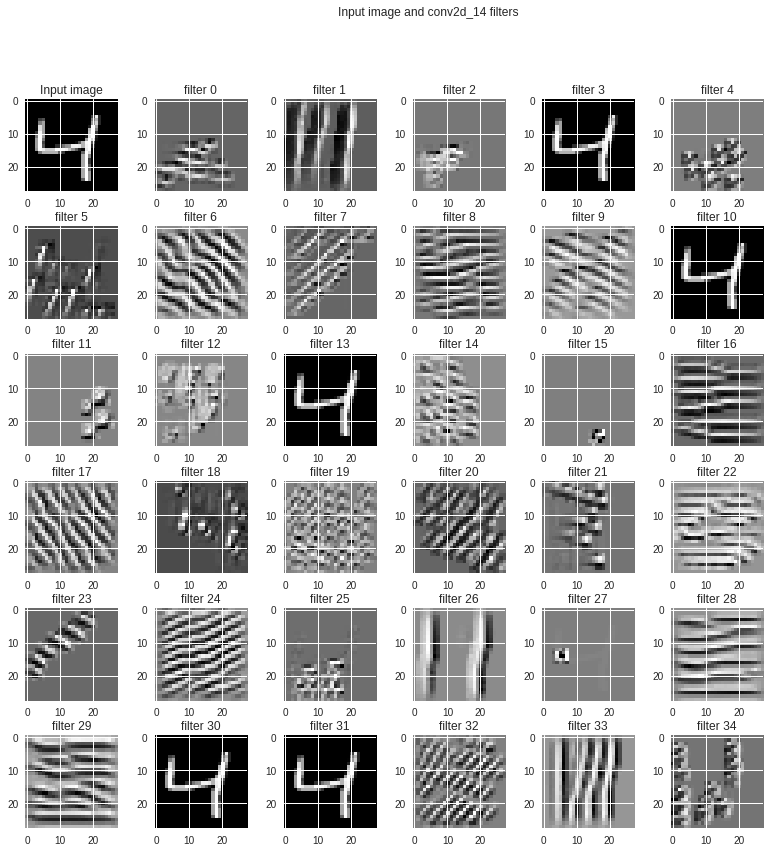

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()